In [33]:
from nltk.stem.snowball import FrenchStemmer
stfr = FrenchStemmer()
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer() 
import nltk
import pandas as pd
import re

In [34]:
#tokenize data
def tokenize(text):
    tokens=re.split('\W+',text)
    return tokens 
def frstemming(x):
    stemmed_text=[stfr.stem(word) for word in x]
    return stemmed_text
def stemming(tokenized_text):
    stemmed_text=[st.stem(word) for word in tokenized_text]
    return stemmed_text

In [35]:
def normalizeArabic(text):
    #normalization of letters
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    #remove tashkeel
    text = re.sub(noise, '', text)
    #remove tatweel and repeating characters
    text = re.sub(r'(.)\1+', r"\1\1", text)
    return text

In [36]:
def removeT(text):
    text = re.sub("@", ' ', text)
    text = re.sub(r"https?:\/\/.*\/\w*", ' ', text)
    text = re.sub("#\w*", ' ', text)
    text = re.sub("\$\w", ' ', text)
    text = re.sub("\&*[amp]*\;|gt+", ' ', text)
    text = re.sub("\&*[amp]*\;|gt+", ' ',text)
    text = re.sub("RT", ' ', text)              
    text = re.sub("\s+\s+", ' ', text)
    text = re.sub("[\n\t\r]+", ' ', text)
    text = re.sub("via+\s", ' ',text)
    return text

In [37]:
#remove stop words
stopwords = f = open("stopwords.txt", encoding="utf8")
mylist = [line.rstrip('\n') for line in stopwords]
def remove_stopwords(text):
    clean_text=[word for word in text if word not in mylist]
    return clean_text 

In [38]:
#remove special characters such as + , = , #
def  remove_special_car(text):
    text = re.sub(r'[^\w]', ' ', text)
    return text
#remove numbers from the text
def remove_numbers(text):
    text = re.sub(r'[0-9]+', ' ', text)
    return text
#remove Hindi numbers 
def remove_Hindi(text):
    text = re.sub("[٠١٢٣٤٥٦٧٨٩]", ' ', text)
#remove extra whitespace
def remove_spaces(text):
    text = re.sub('\s+', ' ', text)
    return text
#remove punctuation and emojis
def remove_punctuation(text):
    text = re.sub('[%s]' % re.escape("""!"#$%&'()€*+,،-“”./:☻;<=>«»’؟?…●@[\]^_`'{|}~"""), ' ', text)
    return text
def removeWeirdChars(text):
    weridPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weridPatterns.sub(r'', text)

In [39]:
def step_one(text):
    text = removeT(text)
    text = remove_punctuation(text)
    text = remove_special_car(text)
    text = remove_numbers(text)
    text = removeWeirdChars(text)
    text = remove_spaces(text)
    return text

In [45]:
df = pd.read_csv("TOTA.csv")

In [46]:
df['text'][364]

"'Coronavirus : une mortalité sous-évaluée en France, faute d’avoir tiré les enseignements des crises précédentes… https://t.co/9OMVpVsFci'"

In [27]:
df['text'][115]

"'يارب 🍃 بعد ازمة #كورونا يرجع الخير للدنيا أكثر من أول والعالم يصير أفضل .. والمسلمين يحسون ببعضهم أكثر وأكثر .. وال… https://t.co/QZbXBUGHgA'"

### Clean the data 

In [47]:
df['text']=df['text'].apply(lambda row : step_one(row))

In [48]:
df['text'][364]

' Coronavirus une mortalité sous évaluée en France faute d avoir tiré les enseignements des crises précédentes '

In [16]:
df['text'][115]

' يارب بعد ازمة يرجع الخير للدنيا أكثر من أول والعالم يصير أفضل والمسلمين يحسون ببعضهم أكثر وأكثر وال '

In [49]:
df['text']=df['text'].apply(lambda row : row.lower())
df['text']=df['text'].apply(lambda row : tokenize(row))
df['text']=df['text'].apply(lambda row : remove_stopwords(row))
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x]))

In [29]:
df['text']=df['text'].apply(lambda row : tokenize(row))

In [50]:
df['text'][364]

' coronavirus mortalité évaluée france faute d tiré enseignements crises précédentes '

In [51]:
df['text'][115]

' يارب ازمة يرجع الخير للدنيا أكثر والعالم يصير أفضل والمسلمين يحسون ببعضهم أكثر وأكثر وال '

In [52]:
df['text']=df['text'].apply(lambda row : normalizeArabic(row))

In [53]:
df['text']=df['text'].apply(lambda row : tokenize(row))
df['text']=df['text'].apply(lambda row : stemming(row))
df['text']=df['text'].apply(lambda row : frstemming(row))
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x]))

In [54]:
df=df[["text","Sentiment"]]

In [55]:
df['text'][364]

' coronavirus mortal évalu franc faut d tir enseign cris précédent '

In [56]:
df['text'][115]

' يرب ازم رجع خير دنا كثر علم يصر فضل سلم يحس بعض كثر كثر وال '

In [14]:
#import plotly.graph_objects as go
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
#import seaborn as sns
#sns.set(color_codes=True)
#import cufflinks as cf
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)
from sklearn.feature_extraction.text import CountVectorizer
#from plotly.offline import iplot
import wordcloud
import nltk
import re
import csv
from collections import Counter
import numpy as np

In [15]:
com= df["text"].values

In [16]:
string2=" "
for i in com:
    string2 += i
    string2 += " "
    

In [17]:
text = arabic_reshaper.reshape(string2)
text = get_display(text)

In [33]:
wordcloud2 = wordcloud.WordCloud(font_path='arial', background_color='white', mode='RGB', width=2000, height=1000).generate(text)

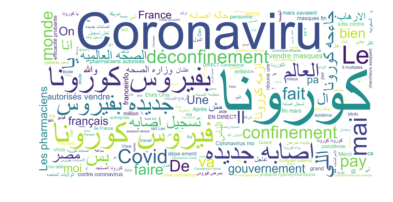

In [80]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
from PIL import Image

In [19]:
twitter_mask = np.array(Image.open("twitter.png"))

In [93]:
twitter_mask

array([[[  2,   2,   2, 110],
        [180, 180, 180, 238],
        [253, 253, 253, 255],
        ...,
        [250, 250, 250, 255],
        [158, 158, 158, 233],
        [  2,   2,   2, 110]],

       [[180, 180, 180, 238],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[253, 253, 253, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       ...,

       [[250, 250, 250, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [250, 250, 250, 255]],

       [[158, 158, 158, 233],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [158, 158, 158, 233]],

       [[  2

In [20]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [22]:
transformed_twitter_mask = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]), np.int32)

for i in range(len(twitter_mask)):
    transformed_twitter_mask[i] = list(map(transform_format, twitter_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [23]:
transformed_twitter_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

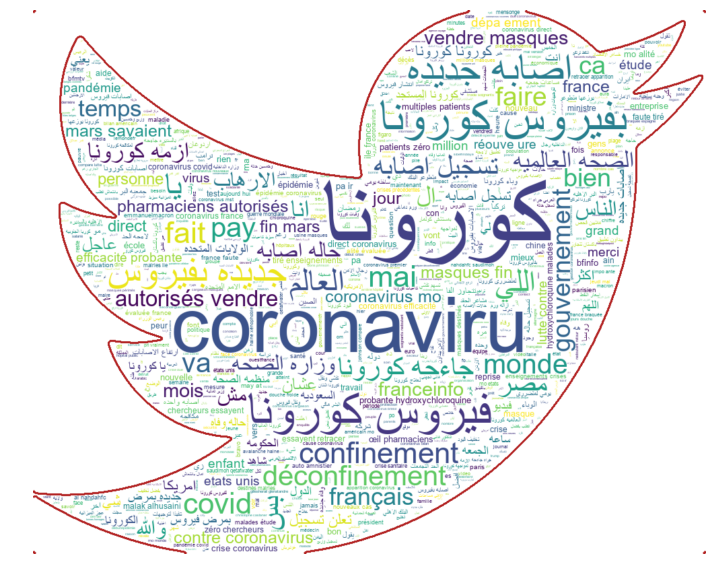

In [21]:
wc = WordCloud(font_path='arial',background_color="white", max_words=1000, mask=twitter_mask,
               contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
df.to_csv("test17.csv" ,index=False)